In [1]:
%matplotlib widget
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import scipy.signal as signal
import matplotlib.pyplot as plt
# import initial_event_times as iet
import event_times as iet

import matplotlib.dates as dates

import obspy.signal.trigger as trigger
# trigger.aic_simple

def pad_zeros(a, num, num2=None):
    """
    Pad num zeros at both sides of array a
    """
    if num2 is None:
        num2 = num
    hstack = [np.zeros(num, dtype=a.dtype), a, np.zeros(num2, dtype=a.dtype)]
    return np.hstack(hstack)

number of events detected: (1975, 7)


In [2]:
iet.df.head()

,index,event_times (mpl),event_times (abs),hphone_idx,ones,event_times,p_arrival_hphone_idx
0,0,18037.318174,2019-05-21T07:38:10.208000Z,h3,1,2019-05-21 07:38:10.208000+00:00,2019-05-21 07:38:10.186000+00:00
1,1,18037.318189,2019-05-21T07:38:11.526000Z,h3,1,2019-05-21 07:38:11.526000+00:00,2019-05-21 07:38:11.517000+00:00
2,2,18037.318203,2019-05-21T07:38:12.754000Z,h3,1,2019-05-21 07:38:12.754000+00:00,2019-05-21 07:38:12.723000+00:00
3,3,18037.318219,2019-05-21T07:38:14.141000Z,h3,1,2019-05-21 07:38:14.141000+00:00,2019-05-21 07:38:14.107000+00:00
4,4,18037.318222,2019-05-21T07:38:14.405000Z,h3,1,2019-05-21 07:38:14.405000+00:00,2019-05-21 07:38:14.592000+00:00


In [3]:
iet.df.head(1).p_arrival_hphone_idx.values[0]

numpy.datetime64('2019-05-21T07:38:10.186000000')

In [5]:
pad_zeros(np.array([1,2,3]), 2)

array([0, 0, 1, 2, 3, 0, 0])

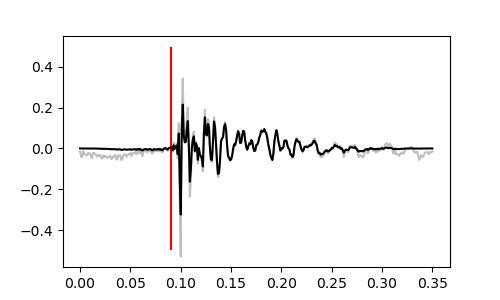

In [6]:
event_id = 72

event_meta = iet.df.iloc[event_id]
event = iet.get_event_window(event_meta['event_times (abs)'], hydrophone=event_meta['hphone_idx'])

fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(event.times(), event.data, color='black', alpha=0.25)

event.taper(type='hann', max_percentage=0.5)
ax.plot(event.times(), event.data, color='black')

aic = trigger.aic_simple(event.data)
ax.vlines(event.times()[aic.argmin()], ymin=0.5, ymax=-0.5, color='red')


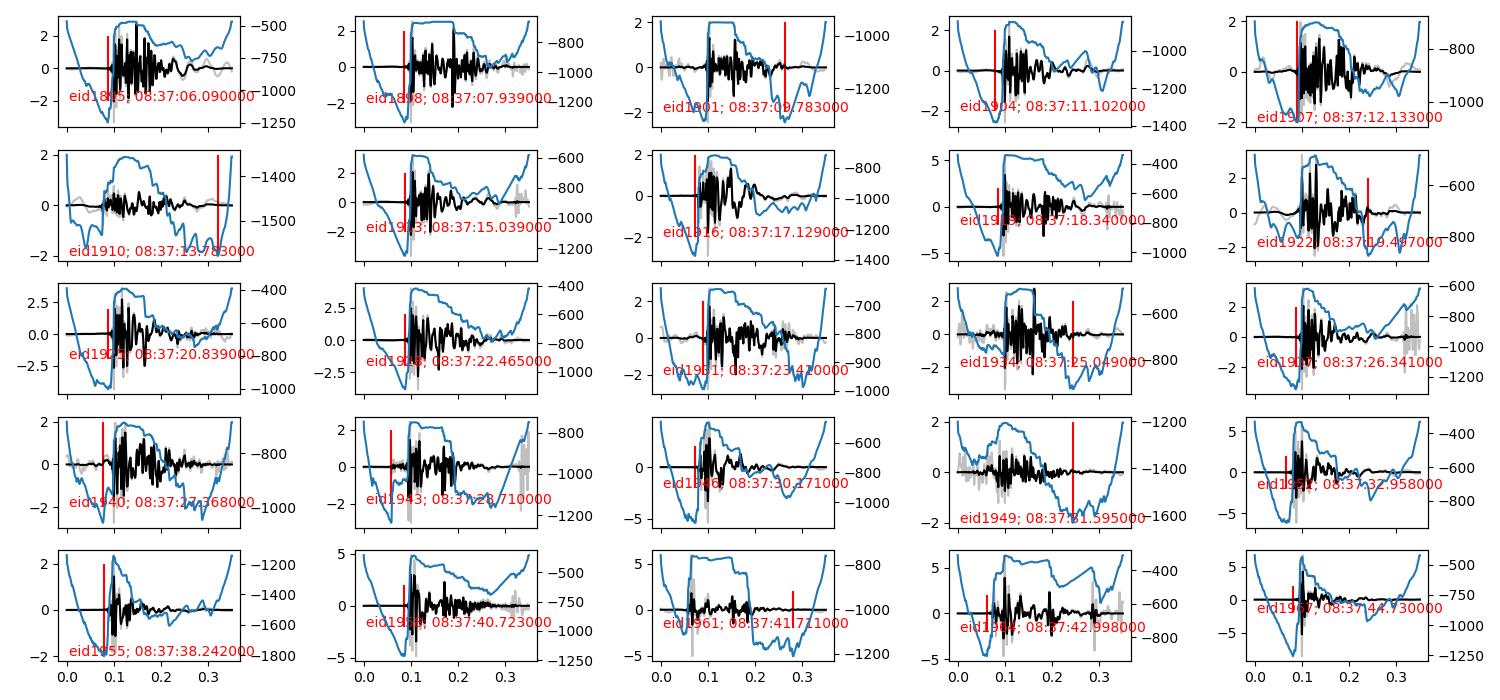

In [88]:
# event_id = 72

fig, ax = plt.subplots(5, 5, figsize=(15, 7), sharex=True)

ax = ax.flatten()

# events = np.random.randint(0, 100, 25)

# evnets for h3
# events = np.arange(0, 25, 1)
# events = np.arange(25, 50, 1)
# events = np.arange(50, 75, 1)
# events = np.arange(75, 100, 1)

#events for h4
events = iet.df[iet.df.hphone_idx=='h4'].index.values[::4]
# events = events[0:25]
# events = events[25:50]
# events = events[75:100]

#events for h5
events = iet.df[iet.df.hphone_idx=='h5'].index.values[::6]
# events = events[0:25]
# events = events[25:50]
# events = events[50:75]
# events = events[75:100]

events = iet.df[iet.df.hphone_idx=='h6'].index.values[::3]
# events = events[0:25]
# events = events[25:50]
# events = events[50:75]
events = events[75:100]

for n, event_id in enumerate(events):
    
    event_meta = iet.df.iloc[event_id]
    event = iet.get_event_window(event_meta['event_times (abs)'], hydrophone=event_meta['hphone_idx'])

    ax[n].plot(event.times(), event.data, color='black', alpha=0.25)

    event.taper(type='hann', max_percentage=0.5)
    ax[n].plot(event.times(), event.data, color='black')
    
    n_zeros = 100

    # this little [n_zeros:-n_zeros] trick keeps from having to change the
    # event.times() to match later
    # aic = trigger.aic_simple(pad_zeros(event.data, n_zeros))[n_zeros:-n_zeros]
    aic = trigger.aic_simple(event.data)
    ax[n].vlines(event.times()[aic.argmin()], ymin=2, ymax=-2, color='red')
    
    t = str(iet.df['event_times'].iloc[event_id]).split()[1].split('+')[0]
    s = 'eid{eid}; {t}'.format(eid=event_id, t=t)
    ax[n].text(s=s, x=0.005, y=-2, color='red')
    
    ax2 = ax[n].twinx()
    ax2.plot(event.times(), aic)

    
fig.tight_layout()

In [94]:
type(iet.df.iloc[0].event_times)

pandas._libs.tslibs.timestamps.Timestamp

In [106]:
# p_arrival_times = []

# events = iet.df.index
# for event_id in events:
#     event = iet.df.iloc[event_id]
#     event = iet.get_event_window(event_meta['event_times (abs)'], hydrophone=event_meta['hphone_idx'])
#     event.taper(type='hann', max_percentage=0.5)
#     aic = trigger.aic_simple(event.data)
#     aic_t = pd.to_datetime(dates.num2date(event.times('matplotlib')[aic.argmin()]))
#     p_arrival_times.append(aic_t)

In [108]:
# iet.df['p_arrivals_hidx'] = p_arrival_times

<AxesSubplot:>

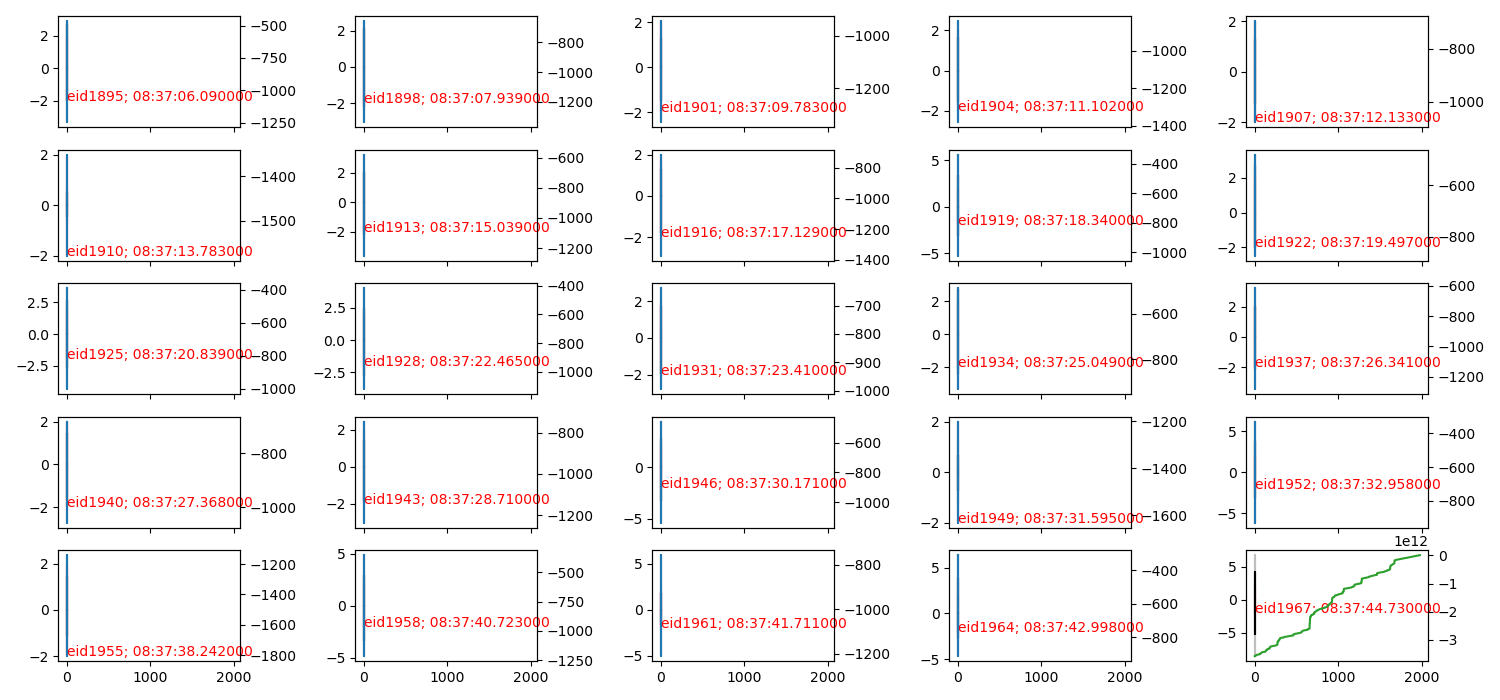

In [114]:
# (iet.df.event_times - iet.df.p_arrivals_hidx).plot()

In [103]:
dates.num2date(event.times('matplotlib'))

datetime.datetime

In [105]:
pd.to_datetime(dates.num2date(event.times('matplotlib')))

DatetimeIndex(['2019-05-21 08:37:44.630000+00:00',
               '2019-05-21 08:37:44.631000+00:00',
               '2019-05-21 08:37:44.632000+00:00',
               '2019-05-21 08:37:44.633000+00:00',
               '2019-05-21 08:37:44.634000+00:00',
               '2019-05-21 08:37:44.635000+00:00',
               '2019-05-21 08:37:44.636000+00:00',
               '2019-05-21 08:37:44.637000+00:00',
               '2019-05-21 08:37:44.638000+00:00',
               '2019-05-21 08:37:44.639000+00:00',
               ...
               '2019-05-21 08:37:44.971000+00:00',
               '2019-05-21 08:37:44.972000+00:00',
               '2019-05-21 08:37:44.973000+00:00',
               '2019-05-21 08:37:44.974000+00:00',
               '2019-05-21 08:37:44.975000+00:00',
               '2019-05-21 08:37:44.976000+00:00',
               '2019-05-21 08:37:44.977000+00:00',
               '2019-05-21 08:37:44.978000+00:00',
               '2019-05-21 08:37:44.979000+00:00',
            

index                                              99
event_times (mpl)                        18037.319864
event_times (abs)         2019-05-21T07:40:36.227000Z
hphone_idx                                         h3
ones                                                1
event_times          2019-05-21 07:40:36.227000+00:00
Name: 99, dtype: object

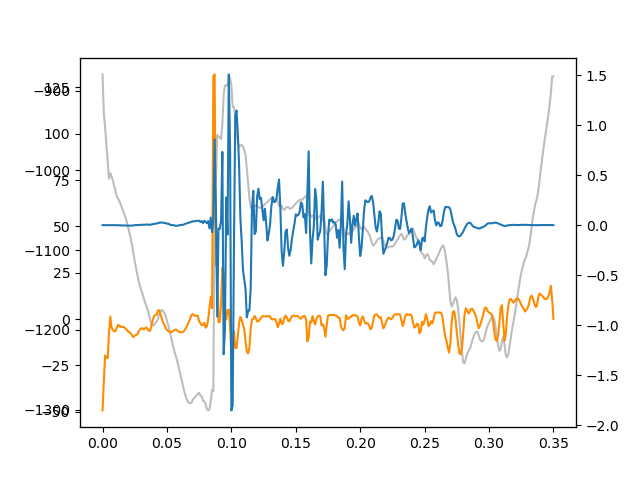

In [53]:
fig, ax = plt.subplots()

ax.plot(event.times(), aic, color='black', alpha=0.26)

ax2 = ax.twinx()
ax2.plot(event.times(), np.gradient(aic), color='darkorange')

ax3 = ax2.twinx()
ax3.plot(event.times(), event.data)
event_meta

In [78]:
event.stats.processing

['ObsPy 1.3.0: trim(endtime=UTCDateTime(2019, 5, 21, 8, 38, 30)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 5, 21, 7, 30))',
 "ObsPy 1.3.0: filter(options={'corners': 1, 'zerophase': False, 'freq': 50}::type='highpass')",
 'ObsPy 1.3.0: trim(endtime=UTCDateTime(2019, 5, 21, 8, 25, 59, 74000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 5, 21, 8, 25, 58, 724000))',
 "ObsPy 1.3.0: taper(max_length=None::max_percentage=0.5::side='both'::type='hann')"]

In [84]:
iet.df[iet.df.hphone_idx=='h6'].index.values[::3].shape


(102,)

In [9]:
# fig, axes = plt.subplots(4, 1, figsize=(15, 5), sharex=True)

# for n, ax in enumerate(axes):
#     data = iet.day141_snapshot[n+2]
#     ax.plot(data.times('matplotlib'), data.data, color='black', alpha=0.75)
#     h_id = list(iet.detector_data.keys())[n]
#     # ax.vlines(x=get_event_times('h3'), ymin=-15, ymax=15, color='red')
#     ax.vlines(x=iet.get_event_times(h_id), ymin=-15, ymax=15, color='red')


# axes[0].set_ylim(-12, 12)
# axes[-1].xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
# fig.tight_layout()

In [10]:
iet.df

,index,event_times (mpl),event_times (abs),hphone_idx,ones,event_times
0,0,18037.318174,2019-05-21T07:38:10.208000Z,h3,1,2019-05-21 07:38:10.208000+00:00
1,1,18037.318189,2019-05-21T07:38:11.526000Z,h3,1,2019-05-21 07:38:11.526000+00:00
2,2,18037.318203,2019-05-21T07:38:12.754000Z,h3,1,2019-05-21 07:38:12.754000+00:00
3,3,18037.318219,2019-05-21T07:38:14.141000Z,h3,1,2019-05-21 07:38:14.141000+00:00
4,4,18037.318222,2019-05-21T07:38:14.405000Z,h3,1,2019-05-21 07:38:14.405000+00:00
...,...,...,...,...,...,...
1970,300,18037.359564,2019-05-21T08:37:46.291000Z,h6,1,2019-05-21 08:37:46.291000+00:00
1971,301,18037.359570,2019-05-21T08:37:46.891000Z,h6,1,2019-05-21 08:37:46.891000+00:00
1972,302,18037.359578,2019-05-21T08:37:47.564000Z,h6,1,2019-05-21 08:37:47.564000+00:00
1973,303,18037.359589,2019-05-21T08:37:48.513000Z,h6,1,2019-05-21 08:37:48.513000+00:00


In [11]:
# event_id = 60
# hydrophone = 'h3'

# event_raw = iet.get_event_window_raw(iet.df['event_times (abs)'].iloc[event_id], hydrophone=hydrophone)

# fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

# t = event_raw.times()

# ax[1].plot(t, event_raw.data)

# # raw event aic
# aic = trigger.aic_simple(event_raw.data)
# aic_arrival = t[aic.argmin()]
# ax[0].plot(t, aic)
# ax[1].vlines(x=aic_arrival, ymin=-5, ymax=5, color='red', label='raw waveform aic')

# # filter 50hz
# event50hz = event_raw.copy().filter(type='highpass', zerophase=False, corners=1, freq=50)
# aic = trigger.aic_simple(event50hz.data)
# aic_arrival = t[aic.argmin()]
# ax[0].plot(t, aic)
# ax[1].vlines(x=aic_arrival, ymin=-5, ymax=5, color='green', label='50 hz aic')

# ax[1].legend(fontsize=15)
# fig.tight_layout()
# aic.argmin()

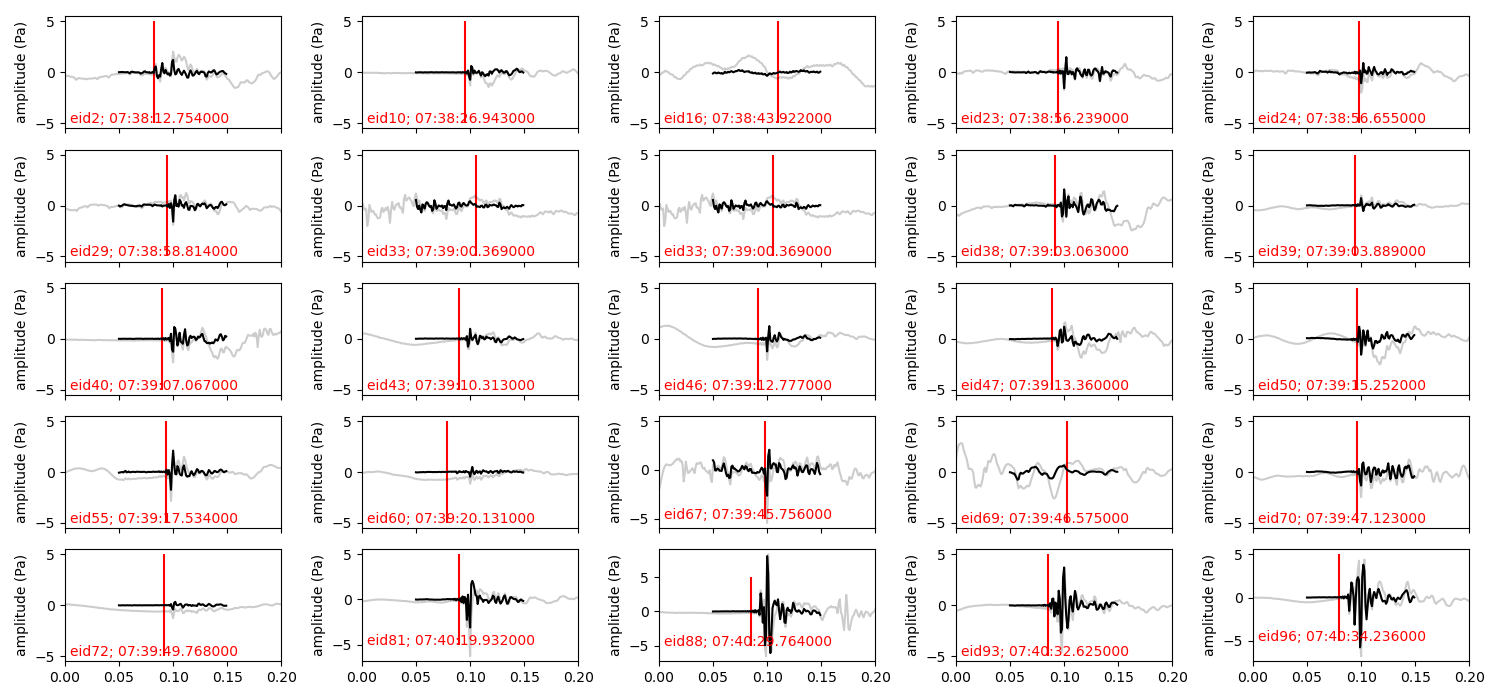

In [12]:
# fig, ax = plt.subplots(5, 1, figsize=(15, 7), sharex=True)
fig, ax = plt.subplots(5, 5, figsize=(15, 7), sharex=True)
ax = ax.flatten()

def aic_ppick(event_id, hydrophone, ax):
    firstcut = 50
    lastcut = 150
    
    ax.set_xlim(0, 0.2)
    
    event_raw = iet.get_event_window_raw(iet.df['event_times (abs)'].iloc[event_id], hydrophone=hydrophone)
    ax.plot(event_raw.times(), event_raw.data, color='black', alpha=0.2)
    event_raw.detrend('demean')
    event_raw.filter(type='highpass', freq=100, corners=1, zerophase=False)

    t = event_raw.times()[firstcut:lastcut]
    data = event_raw.data[firstcut:lastcut]
    
    aic = trigger.aic_simple(data)
    aic_arrival = t[aic.argmin()]
    # print(t)
    
    # ax.plot(t, event_raw.data, color='black')
    ax.plot(t, data, color='black')
    ax.set_ylabel('amplitude (Pa)')
    # ax2 = ax.twinx()
    # ax2.plot(t, aic, color='cyan', zorder=0)
    # ax2.set_ylabel('AIC', color='cyan', fontsize=15)
    ax.vlines(x=aic_arrival, ymin=-5, ymax=5, color='red', label='raw waveform aic')
    
# events = [44, 47, 52, 78, 96]
# events = [90, 91, 92, 93, 94]
events = np.random.randint(0, 100, 25)
events = sorted(events)
for n, e in enumerate(events):
    aic_ppick(e, 'h3', ax[n])
    
    t = str(iet.df['event_times'].iloc[e]).split()[1].split('+')[0]
    s = 'eid{eid}; {t}'.format(eid=e, t=t)
    ax[n].text(s=s, x=0.005, y=-5, color='red')

fig.tight_layout()

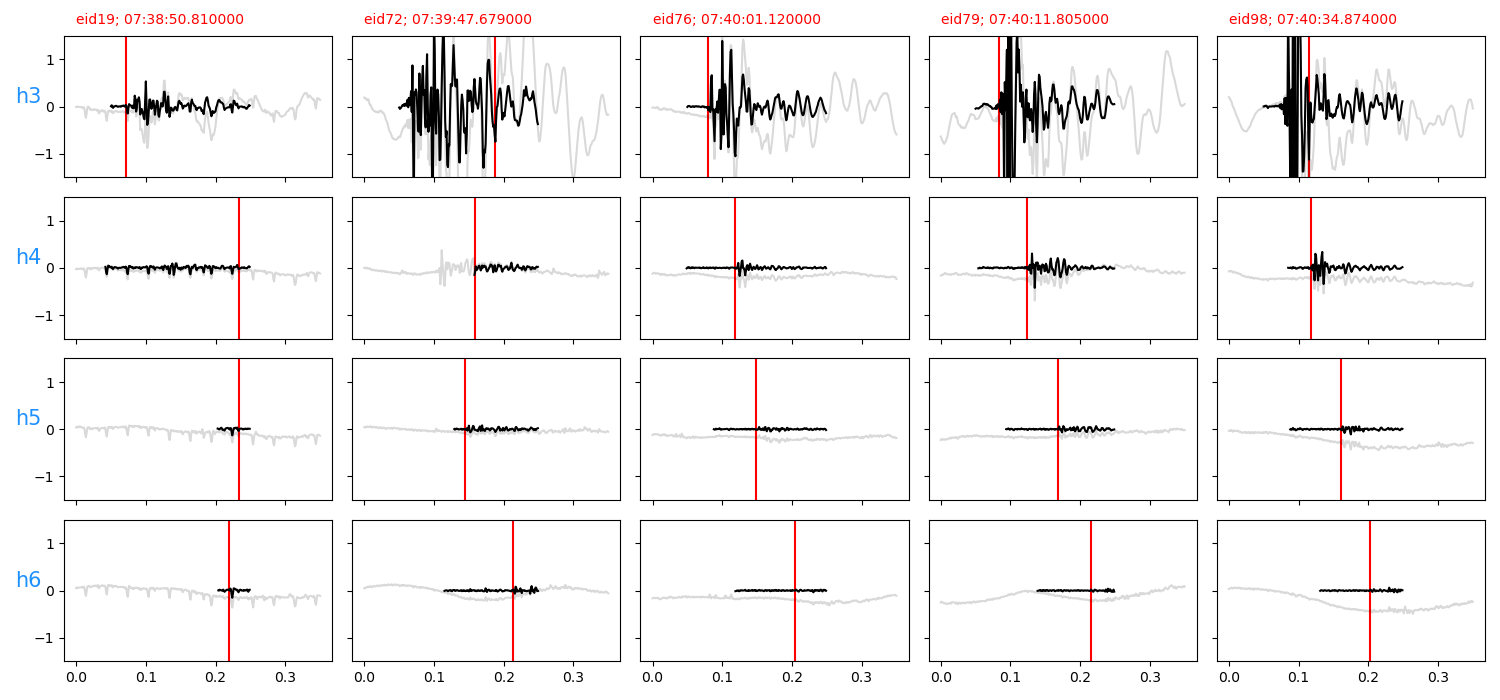

In [89]:
fig, ax = plt.subplots(4, 5, figsize=(15, 7), sharex=True, sharey=True)

# ax = ax.flatten()
# print(ax.shape)


def aic_ppick(times, data, fc, lc):
    """
    uses aic picker to find arrival time
    
    fc and lc tune the input data to control stuff
    """
    firstcut = fc
    lastcut = lc

    t = times[firstcut:lastcut]
    data = data[firstcut:lastcut]
    
    aic = trigger.aic_simple(data)
    aic_arrival = t[aic.argmin()]
    return aic_arrival, aic


events = np.random.randint(0, 100, 5)
events = sorted(events)

hydrophones = ['h3', 'h4', 'h5', 'h6']

for axcol, e in enumerate(events):
    fc = 50
    lc = 250
    
    t = str(iet.df['event_times'].iloc[e]).split()[1].split('+')[0]
    s = 'eid{eid}; {t}'.format(eid=e, t=t)   
    ax[0, axcol].text(s=s, x=0, y=1.75, color='red')
    
    for axrow, h in enumerate(hydrophones):
        ax[axrow, 0].set_ylabel(h, rotation=0, fontsize=15, color='dodgerblue')
        
        event_raw = iet.get_event_window_raw(iet.df['event_times (abs)'].iloc[e], hydrophone=h)
        ax[axrow, axcol].plot(event_raw.times(), event_raw.data, color='black', alpha=0.15)
        
        # ax2 = ax[axrow, axcol].twinx()
        # ax2.plot(event_raw.times(), event_raw.data**2, color='purple', alpha=0.25)

        event_raw.filter(type='highpass', freq=50, corners=1, zerophase=True)
        
        aic_arrival, aic = aic_ppick(times=event_raw.times(), data=event_raw.data, fc=fc, lc=lc)
        ax[axrow, axcol].vlines(aic_arrival, -2.5, 2.5, color='red')
        
        t = event_raw.times()[fc:lc]
        d = event_raw.data[fc:lc]
        ax[axrow, axcol].plot(t, d, color='black')

        
        fc = fc + aic.argmin() - 30

    
ax[axrow, axcol].set_ylim(-1.5, 1.5)

fig.tight_layout()

/tmp/ipykernel_10326/3163935498.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(time, freq, spec, cmap='Oranges')


Text(0.11900000000000001, -20, 'aic arrival time')

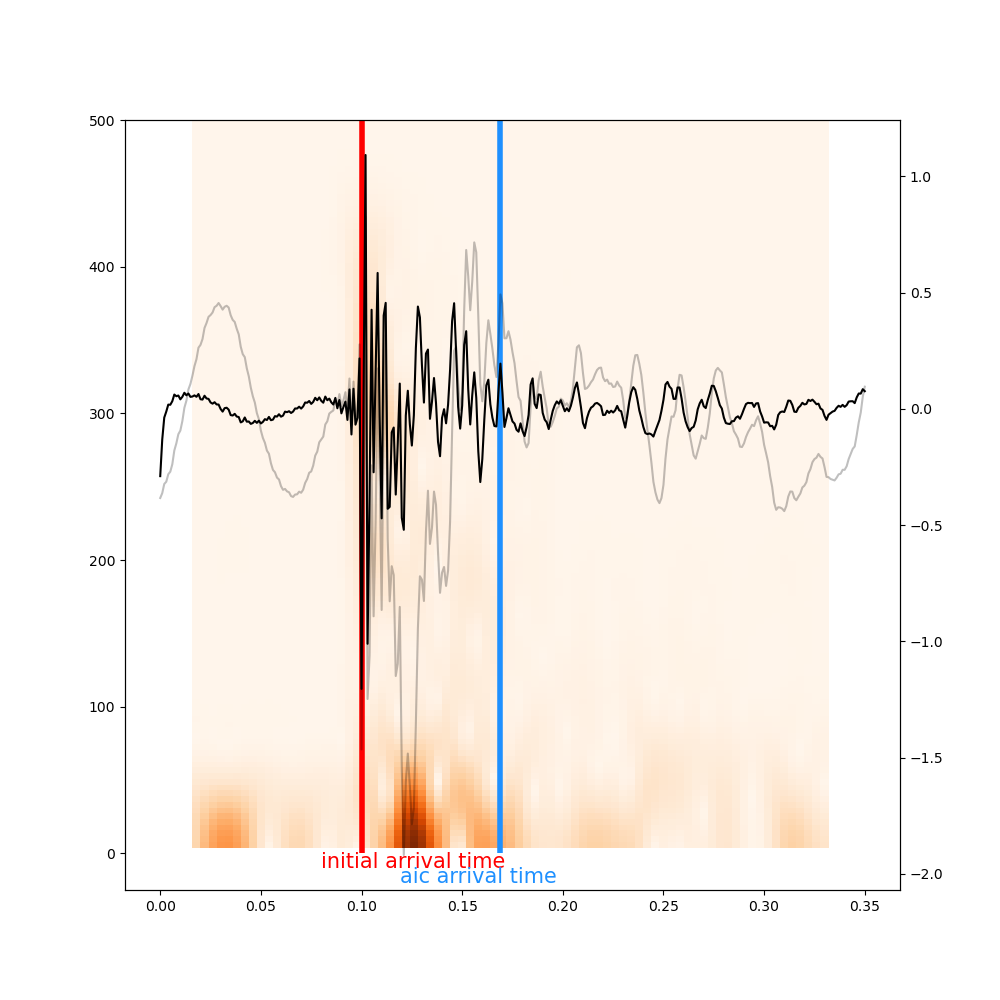

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

working_event = 75
non_working_event = 50

event_initial_time = iet.df['event_times (abs)'].iloc[50]
event_raw = iet.get_event_window_raw(event_initial_time, hydrophone='h3')
spec, freq, time = signal_processing.spectrogram(event_raw.data, samp_rate=1000)
ax.pcolormesh(time, freq, spec, cmap='Oranges')
ax2 = ax.twinx()
ax2.plot(event_raw.times(), event_raw.data, color='black', alpha=0.25)

# start_window_edge = -0.1
# end_window_edge = 0.25
ax.vlines(0.1, ymin=0, ymax=500, color='red', linewidth=4)
ax.text(s='initial arrival time', x=0.08, y=-10, color='red', fontsize=15,)

event_raw.filter(type='highpass', freq=100, zerophase=False, corners=1)
ax2.plot(event_raw.times(), event_raw.data, color='black')

aic_arrival, aic = aic_ppick(event_raw.times(), event_raw.data, fc=0, lc=-1)
ax.vlines(aic_arrival, ymin=0, ymax=500, color='dodgerblue', linewidth=4)
ax.text(s='aic arrival time', x=aic_arrival-0.05, y=-20, color='dodgerblue', fontsize=15,)

# ax3 = ax2.twinx()
# ax3.plot(event_raw.times()[:-1], aic)

In [ ]:
# fig, ax = plt.subplots(4, 5, figsize=(15, 7), sharex=True)
# ax[0,3].plot([1,2,3], [3,2,1], color='red')


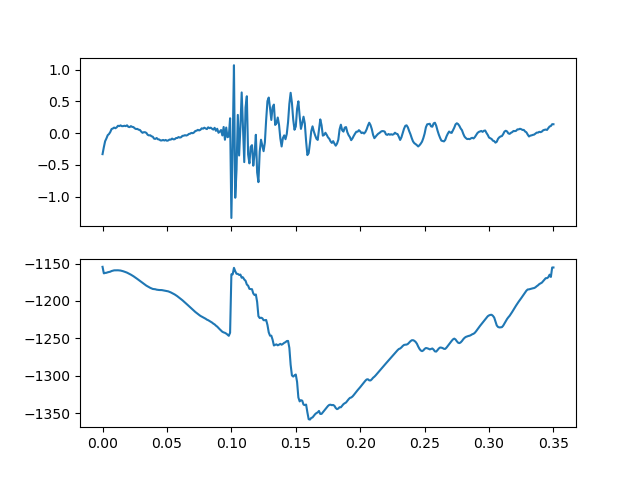

In [91]:
fig, ax = plt.subplots(2, 1, sharex=True)

event_initial_time = iet.df['event_times (abs)'].iloc[50]
event_raw = iet.get_event_window_raw(event_initial_time, hydrophone='h3')

event_raw.filter(type='highpass', freq=50, zerophase=False, corners=1)
ax[0].plot(event_raw.times(), event_raw.data)
ax[1].plot(event_raw.times(), trigger.aic_simple(event_raw.data))